# 의사결정나무 (decision tree)

* `스무고개`와 유사한 개념
* 의사결정나무는 `분류 Classification`와 `회귀(Regression)`모두 가능한 알고리즘이다.
* `반복적 분할 Recursive Partition`을 통해 결정경계를 그리는 알고리즘이다.
* 
<img src="./images/31.머신러닝_지도학습_2_descision_tree_01.png" width="500" height="300">

###### graphviz 설치
* 트리구조등의 그래프를 시각화하는 tool
* 다운로드 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
  1. 다운로드 & 설치
  2. path 설정 : sysdm.cpl
     - c:\Program Files\Graphviz\bin
     - c:\Program Files\Graphviz\bin\dot.exe(생략)
  3. 패키지설치
     - pip install graphviz or conda install garaphviz

In [2]:
!pip install graphviz
!pip show graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 594.9 kB/s eta 0:00:00
Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: 
Required-by: 


In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import mglearn
import graphviz

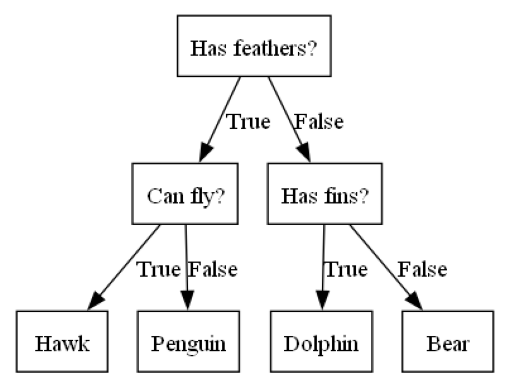

In [5]:
mglearn.plots.plot_animal_tree()

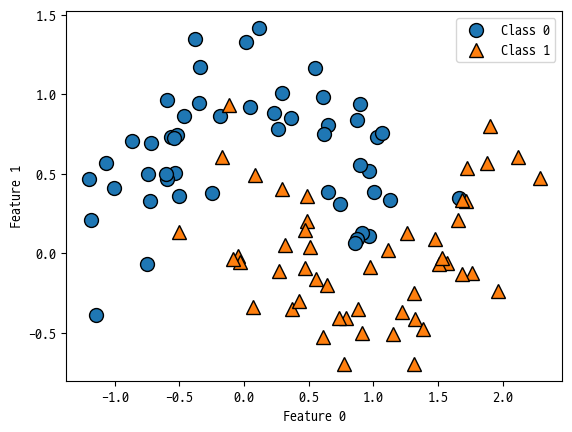

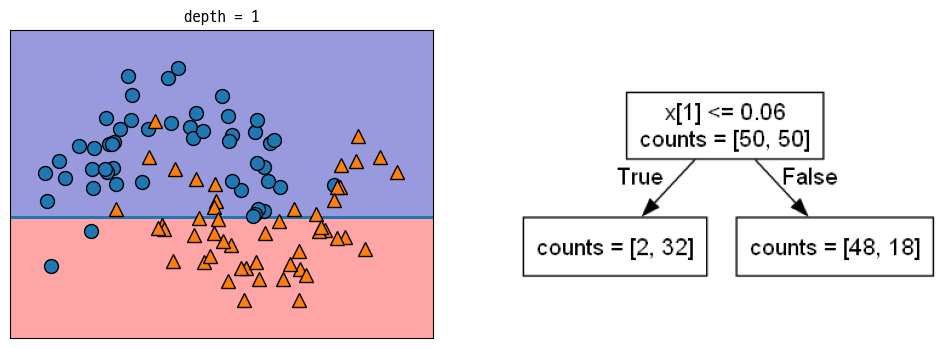

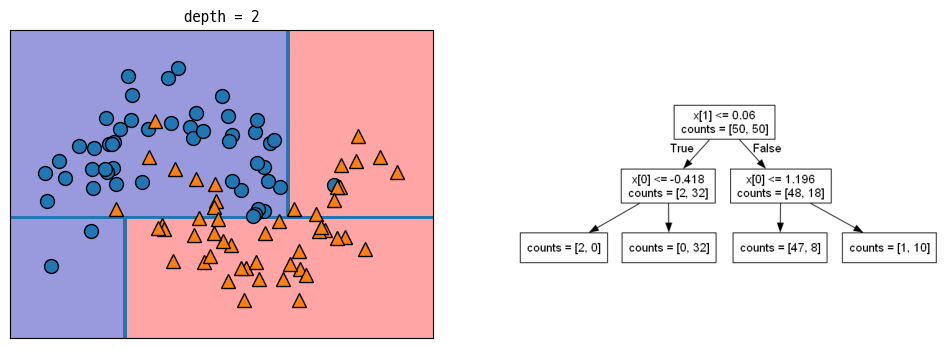

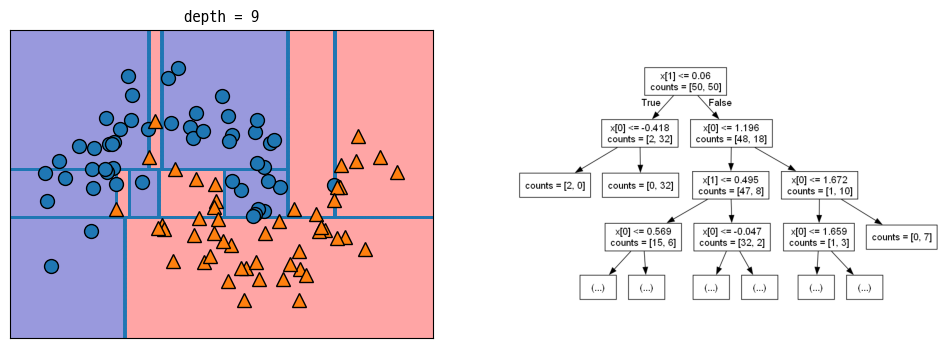

In [6]:
mglearn.plots.plot_tree_progressive()

#### 실습. 유방암데이터셋으로 Decision Tree알고리즘으로 학습시키기

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'유방암 데이타의 keys = {cancer.keys()}')
print(f'유방암 데이타의 size = {cancer.data.shape}')

유방암 데이타의 keys = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이타의 size = (569, 30)


In [18]:
# 악성 vs 양성 갯수 : 212 vs 357
print('유방암여부의 샘플 갯수 = {}'.format(\
    {n: cnt for n, cnt in zip(cancer.target_names, np.bincount(cancer.target))}))
print('\n유방암 특성의 이름= \n{}'.format(cancer.feature_names))

유방암여부의 샘플 갯수 = {'malignant': 212, 'benign': 357}

유방암 특성의 이름= 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [26]:
# skleanr DT의 알고리즘, DecisiontTreeClassfier(분류모델), DecisionTreeRegression(회귀모델)
# 2가지가 있다. DecisiontTree는 과대적합이 발생되는 대표적인 알고리즘이다.
# 이를 방지하기 위해서 sklearn의 DecisiontTree모델은 사전가지치기라는 옵션을 제공한다.
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test \
    = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print(f'학습용 데이터셋의 예측 = {dt.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 예측 = {dt.score(X_test, y_test):.2f}')

# 결과분석
# 예상한바와 같이 과거데이터는 잘 맞추는 즉, 100%의 정확도 결과가 나왔다.
# 즉, DT알고리즘은 과대적합이 발생이 되었다.
# 결정트리의 depth를 제한하지 않으면 depth가 무한정 깊어지고 복잡해 질 수가 있다.
# 즉, 모델이 복잡하다는 것은 과대적합이 발생이 되고 새로운 데이터를 예측을 못할 수가
# 있다는 것이다. 
# 과대적합을 방지하기위해서 사전가지치기를 해서 모델의 복잡도를 낮추어서 새로운 데이터를
# 예착할 수 있도록 조정을 한다.

# 현재모델의 depth
print(f'현 훈련된 모델의 depth = {dt.get_depth()} depth')

학습용 데이터셋의 예측 = 1.00
검증용 데이터셋의 예측 = 0.90
현 훈련된 모델의 depth = 5 depth


In [27]:
# 사전가지치기
def dt_depth(depth=3):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    print(f'현 훈련된 모델의 depth = {dt.get_depth()} depth')
    print(f'학습용 데이터셋의 예측 = {dt.score(X_train, y_train):.2f}')
    print(f'검증용 데이터셋의 예측 = {dt.score(X_test, y_test):.2f}')  
    print()

In [35]:
for d in [7,5,3,2,1]:
    dt_depth(d)

현 훈련된 모델의 depth = 5 depth
학습용 데이터셋의 예측 = 1.00
검증용 데이터셋의 예측 = 0.90

현 훈련된 모델의 depth = 5 depth
학습용 데이터셋의 예측 = 1.00
검증용 데이터셋의 예측 = 0.90

현 훈련된 모델의 depth = 3 depth
학습용 데이터셋의 예측 = 0.98
검증용 데이터셋의 예측 = 0.92

현 훈련된 모델의 depth = 2 depth
학습용 데이터셋의 예측 = 0.93
검증용 데이터셋의 예측 = 0.89

현 훈련된 모델의 depth = 1 depth
학습용 데이터셋의 예측 = 0.93
검증용 데이터셋의 예측 = 0.89



In [41]:
# DT의 결과 시각화(파일저장, 출력)하기 by graphviz
from sklearn.tree import export_graphviz
depth = 7
dt = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
export_graphviz(dt, out_file='./decision_tree.dot', class_names=['악성','양성']
                , feature_names=cancer.feature_names, impurity=False, filled=True)

with open('./decision_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()

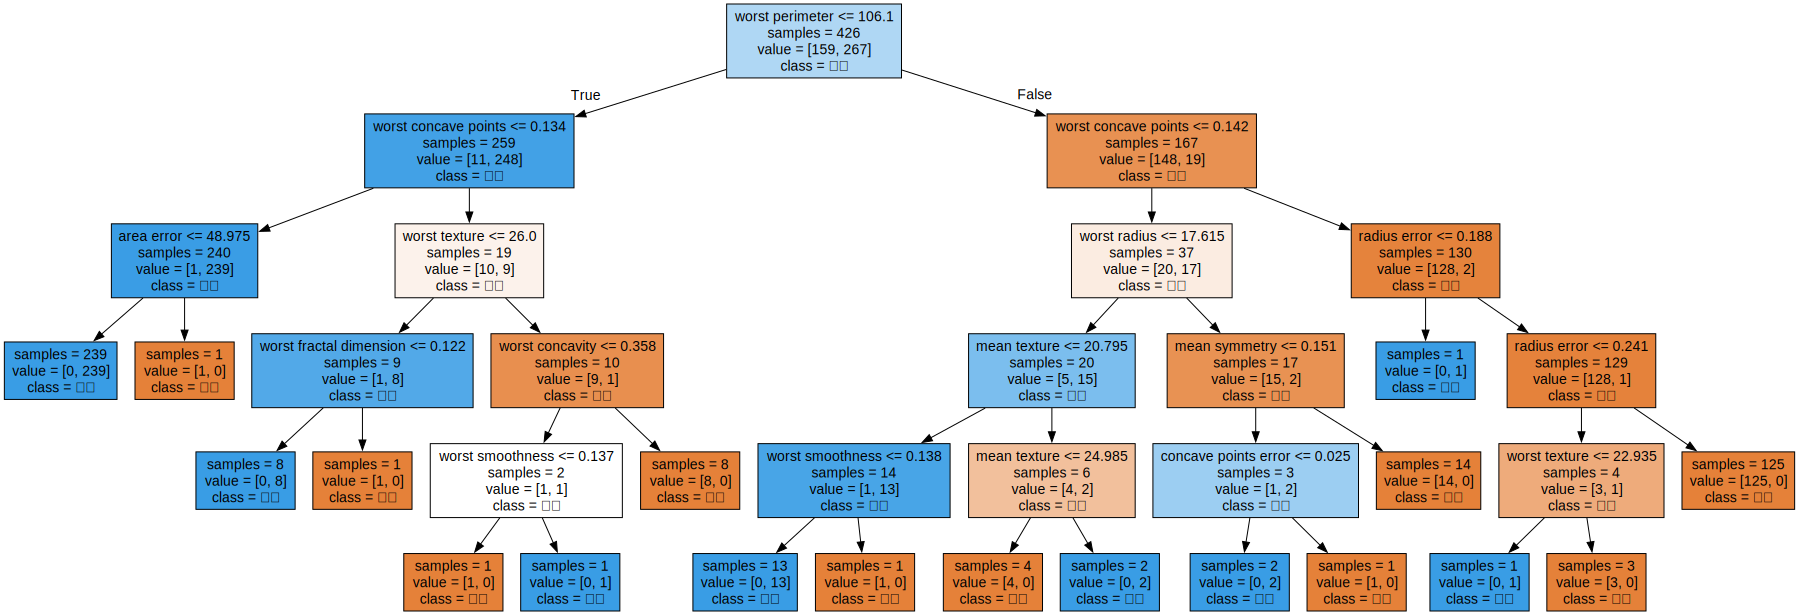

In [42]:
display(graphviz.Source(dot_graph))

##### 트리의 중요도

* 전체트리를 한번에 보는 것이 어려울 수가 있더 요약한 특성을 사용할 수가 있다.
* 가장 널리 사용하는 속성이 `특성의 중요도 feature importance`이다.
* 이 값은 `0과 1사이의 값`으로 각 특성에 대해 0은 전혀 사용되지 않았다는 의미이고
* 1은 완벽하게 타킷(클래스, 정답)을 예측했다는 의미이다.

In [47]:
print(f'{dt.feature_importances_}')
print(f'예측에 가장 영향을 미친 속성 = {np.argmax(dt.feature_importances_)}')
print(f'예측에 가장 영향을 미친 속성명 = {cancer.feature_names[np.argmax(dt.feature_importances_)]}')

[0.         0.02831198 0.         0.         0.         0.
 0.         0.         0.01101841 0.         0.01223453 0.
 0.         0.00999282 0.         0.         0.         0.00668975
 0.         0.         0.03687207 0.03710758 0.72534081 0.
 0.01433518 0.         0.00401385 0.10516335 0.         0.00891967]
예측에 가장 영향을 미친 속성 = 22
예측에 가장 영향을 미친 속성명 = worst perimeter


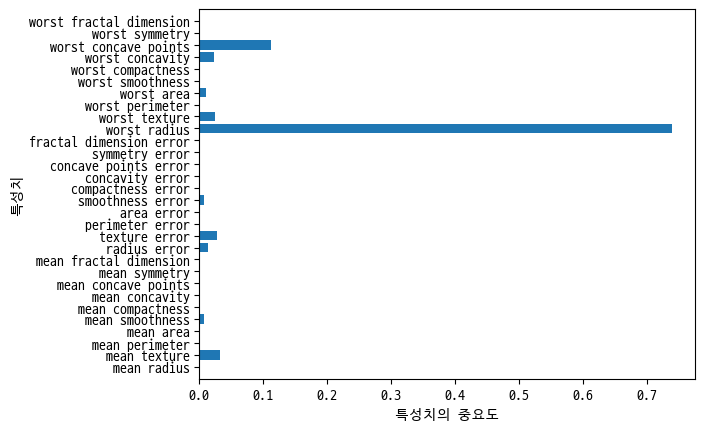

In [60]:
# 특성의 중요도에 대한 시각화
def feature_importance(model):
    f_cnt = cancer.data.shape[1]
    plt.barh(range(f_cnt), model.feature_importances_, align='center')
    plt.xlabel('특성치의 중요도')
    plt.ylabel('특성치')
    plt.ylim(-1, f_cnt)
    plt.yticks(np.arange(f_cnt), cancer.feature_names)

feature_importance(dt)

# 결과분석
# 유방암에 가장 큰 영향을 준 특성은 약 73% worst perimeter로 나타난다.
# 다른 특성의 예측값이 낮다고 해서 해당특성이 유용하지 않다는 뜻은 아니다.
# 단지, 트리모델이 해당 특성을 선택하지 않았다는 뜻이다.
# 다른 데이터를 가지고 학습할 경우에는 다른 특성이 가장 중요한 특성으로 나타날 수 있다.
# 이런 것들을 감안해서 다양한 데이터로 학습을 해서 가장 예측률이 높은 모델을 최작화된
# 모델로 설정해서 예측을 하는 것이 바람직하다.

학습용 데이터셋의 예측 = 1.00
검증용 데이터셋의 예측 = 0.93


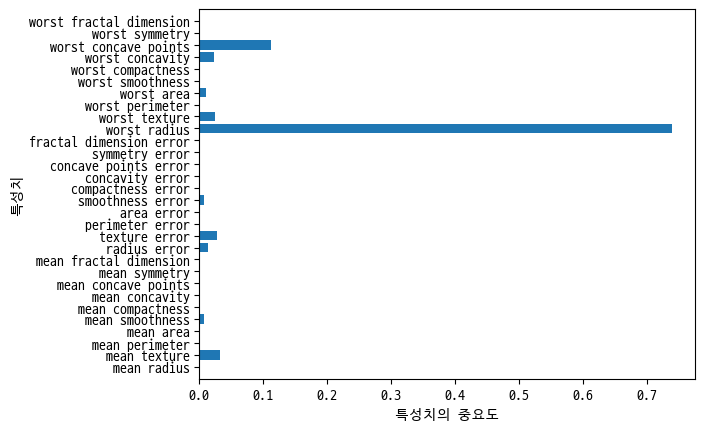

In [61]:
X_train, X_test, y_train, y_test \
    = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)

dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print(f'학습용 데이터셋의 예측 = {dt.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 예측 = {dt.score(X_test, y_test):.2f}')
feature_importance(dt)

In [63]:
# 실습. iris데이터셋으로 DecisionTreeClassfier모델 적용해 보기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
# 3,4열 즉, 꽃잎의 데이터만 사용
X = iris.data[:,[2,3]]
y = iris.target

In [73]:
# 정규화 : StandardScaler
# 평균 = 0, 분산 = 1인 정규분포로 정규화
# (x - 평균) / 표준편차
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler().fit(X_train)

X_train_sd = sc.transform(X_train)
X_test_sd = sc.transform(X_test)

print(X_train[:5], '==>',  X_train_sd[:5])
print()

print(X_test[:5], '==>',  X_test_sd[:5])

[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]] ==> [[-0.18295039 -0.29318114]
 [ 0.93066067  0.7372463 ]
 [ 1.04202177  1.63887031]
 [ 0.6522579   0.35083601]
 [ 1.09770233  0.7372463 ]]

[[5.1 2.4]
 [4.  1. ]
 [1.4 0.2]
 [6.3 1.8]
 [1.5 0.2]] ==> [[ 0.70793846  1.51006688]
 [ 0.09545238 -0.29318114]
 [-1.35224199 -1.32360858]
 [ 1.37610509  0.7372463 ]
 [-1.29656144 -1.32360858]]


In [75]:
# 1. 표준화전(데이터전처리하지 않은 데이터셋)
dt_iris = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
dt_iris.fit(X_train, y_train)
print(f'학습용 데이터셋의 예측 = {dt_iris.score(X_train, y_train):.2f}')
print(f'검증용 데이터셋의 예측 = {dt_iris.score(X_test, y_test):.2f}')

학습용 데이터셋의 예측 = 0.98
검증용 데이터셋의 예측 = 0.98


In [77]:
# 2. 표준화후(데이터전처리를 한 데이터셋)
dt_iris = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
dt_iris.fit(X_train_sd, y_train)
print(f'학습용 데이터셋의 예측 = {dt_iris.score(X_train_sd, y_train):.2f}')
print(f'검증용 데이터셋의 예측 = {dt_iris.score(X_test_sd, y_test):.2f}')

학습용 데이터셋의 예측 = 0.98
검증용 데이터셋의 예측 = 0.98


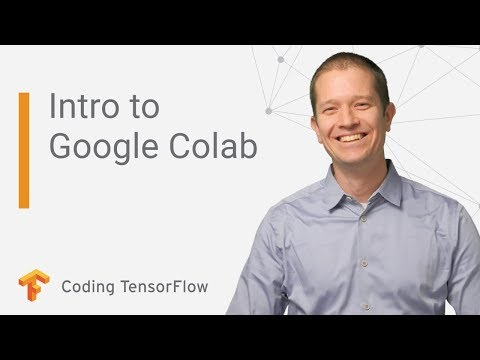

In [80]:
# 구글코랩 사용법
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

### 결정트리 앙상블

* 앙상블알고리즘에는 `랜덤 포레스트 Random Forest`와 `그레이언트 부스팅 Gradient Boosting`결정트리가 있다.
* 의사결정나무의 가장 큰 단점은 과대적합화가 발생한다는 것이다. 이런 보완한 알고리즘이 랜덤포레스트이다.
* 랜덤포레스트 알고리즘은 사전에 지정한 트리의 갯수의 결정트리에서 무작위로 몇 개의 결정트리를 선택해 훈련하는 알고리즘이다.

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [86]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , stratify=y, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=3).fit(X_train, y_train)
forest

RandomForestClassifier(n_estimators=5, random_state=3)

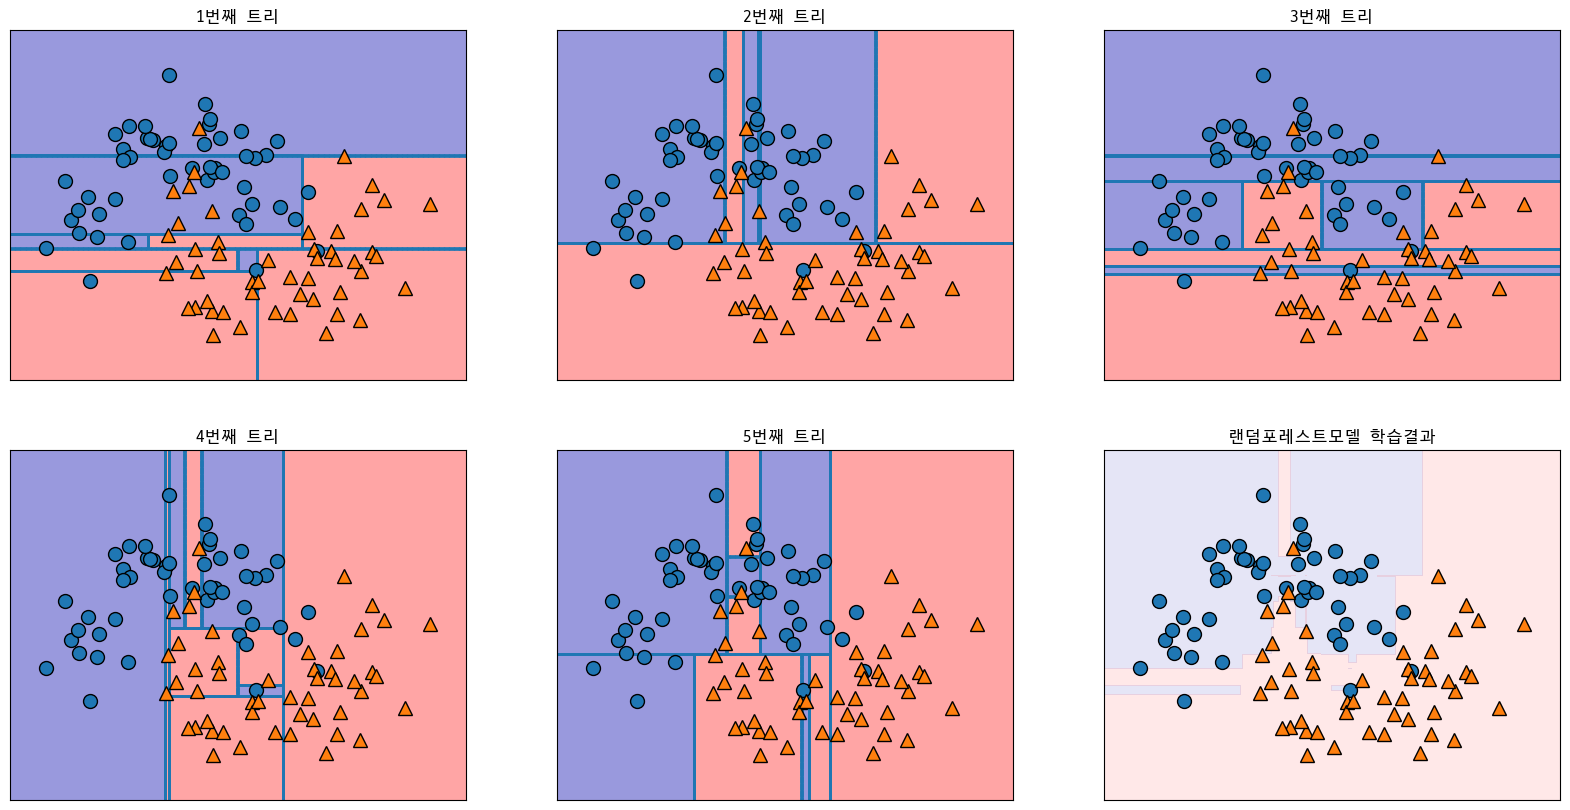

In [97]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    # print(i, ax, tree)
    ax.set_title(f'{i+1}번째 트리')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.1)
axes[-1, -1].set_title('랜덤포레스트모델 학습결과')
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

In [99]:
# 랜덤포레스트(n_estimators=100....)
# 실습1. iris데이터셋
# 살습2. 유방암데이터셋
# 살습3. 보스턴 주택가격 데이터셋